In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###  Régression linéaire multiple

In [ ]:
# chargement du dataset
df = pd.read_csv("advertising.csv")

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
# Extraction des colonnes X
X = df[['TV', 'Radio', 'Newspaper']]

#X = df[['TV', 'Radio']]
# Extraction de la colonne y
y = df['Sales']

In [ ]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [ ]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [ ]:
print(X.shape)
print(y.shape)


(200, 3)
(200,)


In [ ]:
X.shape

(200, 3)

In [ ]:
y=y.values.reshape(-1,1)
y.shape

(200, 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train=(X_train-X_train.mean())/X_train.std()
X_test=(X_test-X_test.mean())/X_test.std()

#from sklearn.preprocessing import MinMaxScaler
# create an instance of MinMaxScaler
#scaler = MinMaxScaler()
# fit and transform the x train data qnd x test
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.fit_transform(X_test)

X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))
X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))

In [ ]:
print(X_test.shape)
print(X_train.shape)

(40, 4)
(160, 4)


In [ ]:
np.random.seed(0) # pour produire toujours le meme vecteur theta aléatoire
theta=np.random.randn(4,1)
print('Theta:',theta)

Theta: [[1.76405235]
 [0.40015721]
 [0.97873798]
 [2.2408932 ]]


In [ ]:
def model(X, theta):
    return X.dot(theta)

In [ ]:
#Fonction de cout non regularisee
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)
#Fonction de cout regularisee
def cost_function_Regularisation(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)+1/(2*m)* np.sum(theta**2)

In [ ]:
cost_function(X_train, y_train, theta)

91.74091996597303

In [ ]:
cost_function_Regularisation(X_train, y_train, theta)

91.76983101860579

In [ ]:
#gradient non regularisee
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)
#gradient regularisee
def grad_Regularisation(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)+(1/m) *theta

In [ ]:
#descente de gradient non regularisee
def gradient_descent(X, y, theta, learning_rate, n_iterations):

    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele

    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]

    return theta, cost_history
#descente de gradient regularisee
def gradient_descent_Regularisation(X, y, theta, learning_rate, n_iterations):

    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele

    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad_Regularisation(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function_Regularisation(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]

    return theta, cost_history

In [ ]:
n_iterations = 10000
learning_rate = 0.03

theta_final_reg, cost_history_reg = gradient_descent_Regularisation(X_train, y_train, theta, learning_rate, n_iterations)
theta_final, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, n_iterations)

In [ ]:
theta_final

array([[ 4.60161031],
       [ 1.49451794],
       [ 0.088192  ],
       [15.330625  ]])

In [ ]:
theta_final_reg

array([[ 4.57327503],
       [ 1.48533353],
       [ 0.09172014],
       [15.23540373]])

In [ ]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions_test = model(X_test, theta_final)
predictions_train = model(X_train, theta_final)
predictions_testReg = model(X_test, theta_final_reg)
predictions_trainReg = model(X_train, theta_final_reg)

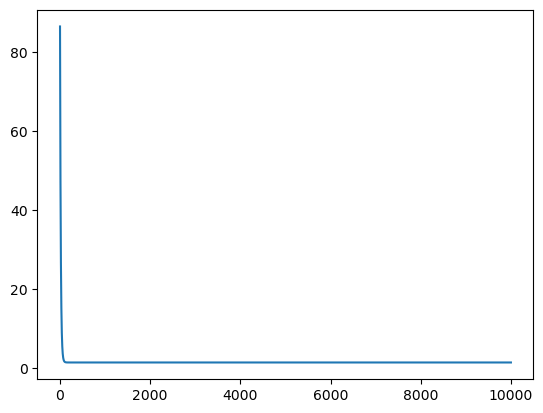

In [ ]:
plt.plot(range(n_iterations), cost_history)
plt.show()

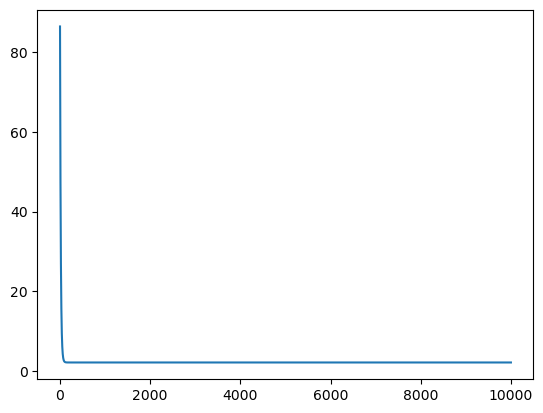

In [ ]:
plt.plot(range(n_iterations), cost_history_reg)
plt.show()

In [ ]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [ ]:
c_test=coef_determination(y_test, predictions_test)
c_test

0.8753224470083143

In [ ]:
c_testReg=coef_determination(y_test, predictions_testReg)
c_testReg

0.8803518567834501

In [ ]:
c_train=coef_determination(y_train, predictions_train)
c_train

0.9001416005862131

In [ ]:
c_trainReg=coef_determination(y_train, predictions_trainReg)
c_trainReg

0.8997699412855069

In [ ]:
print(c_test-c_testReg)
print(c_train-c_trainReg)

-0.005029409775135774
0.00037165930070615083



|            |Avec regularisation|Sans regularisation|
------|------|--------|
 Fonction cout|91.76983101860579|91.74091996597303|
 Coef determination TEST|0.8803518567834501|0.8753224470083143|
 Coef determination TRAIN|0.8997699412855069|0.9001416005862131

###  Régression polynômiale multivariée de degré 2

In [ ]:
# chargement du dataset
data = pd.read_csv("advertising.csv")

In [ ]:
# Extraction des colonnes X
X = data[['TV', 'Radio', 'Newspaper']]

#X = df[['TV', 'Radio']]
# Extraction de la colonne y
y = data['Sales']
a=X.iloc[:,0:1].values
b=X.iloc[:,1:2].values
c=X.iloc[:,2:3].values



In [ ]:
X = np.hstack((a,b,c,a**2,b**2,c**2,a*b,a*c,b*c))

In [ ]:
X.shape

(200, 9)

In [ ]:
X

array([[2.301000e+02, 3.780000e+01, 6.920000e+01, ..., 8.697780e+03,
        1.592292e+04, 2.615760e+03],
       [4.450000e+01, 3.930000e+01, 4.510000e+01, ..., 1.748850e+03,
        2.006950e+03, 1.772430e+03],
       [1.720000e+01, 4.590000e+01, 6.930000e+01, ..., 7.894800e+02,
        1.191960e+03, 3.180870e+03],
       ...,
       [1.770000e+02, 9.300000e+00, 6.400000e+00, ..., 1.646100e+03,
        1.132800e+03, 5.952000e+01],
       [2.836000e+02, 4.200000e+01, 6.620000e+01, ..., 1.191120e+04,
        1.877432e+04, 2.780400e+03],
       [2.321000e+02, 8.600000e+00, 8.700000e+00, ..., 1.996060e+03,
        2.019270e+03, 7.482000e+01]])

In [ ]:
y=y.values.reshape(-1,1)
y.shape

(200, 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(160, 9)

In [ ]:

X_train=(X_train-X_train.mean())/X_train.std()
X_test=(X_test-X_test.mean())/X_test.std()

#from sklearn.preprocessing import StandardScaler
# Initialisez le StandardScaler
#scaler = StandardScaler()
# Normalisez X_train et X_test
#X_train = scaler.fit_transform(X_train)
#X_test= scaler.fit_transform(X_test)

X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))
X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))


In [ ]:
X_train.shape

(160, 10)

In [ ]:
X_train

array([[-0.35164069, -0.36029141, -0.3590613 , ..., -0.14686712,
        -0.34669868,  1.        ],
       [-0.34676817, -0.3601636 , -0.36039525, ..., -0.2704214 ,
        -0.35615216,  1.        ],
       [-0.35746375, -0.35877374, -0.35810277, ..., -0.24006721,
        -0.28604781,  1.        ],
       ...,
       [-0.34351716, -0.35823057, -0.3561937 , ...,  0.66506219,
        -0.20302888,  1.        ],
       [-0.34767877, -0.36010769, -0.35950062, ..., -0.12809913,
        -0.34684805,  1.        ],
       [-0.33852483, -0.3600997 , -0.35919709, ...,  0.11806049,
        -0.34364177,  1.        ]])

In [ ]:
np.random.seed(0) # pour produire toujours le meme vecteur theta aléatoire
theta=np.random.randn(10,1)
print('Theta:',theta)

Theta: [[ 1.76405235]
 [ 0.40015721]
 [ 0.97873798]
 [ 2.2408932 ]
 [ 1.86755799]
 [-0.97727788]
 [ 0.95008842]
 [-0.15135721]
 [-0.10321885]
 [ 0.4105985 ]]


In [ ]:
def model(X, theta):
    return np.dot(X, theta)

In [ ]:
def cost_function(X, y, theta):
    m = len(y)
    return (1/(2*m) * np.sum((model(X, theta) - y)**2))

def cost_function_Regularisation(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)+(1/(2*m))* np.sum(theta**2)

In [ ]:
cost_function(X_train, y_train, theta)


74.28430598427326

In [ ]:
cost_function_Regularisation(X_train, y_train, theta)

74.33055349680554

In [ ]:
# définir la fonction de gradient
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)
def grad_Regularisation(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)+(1/m) *theta

In [ ]:
# Définir la descente de gradient
def gradient_descent(X, y, theta, learning_rate, n_iterations):

    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele

    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]

    return theta, cost_history
def gradient_descent_Regularisation(X, y, theta, learning_rate, n_iterations):

    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele

    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad_Regularisation(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function_Regularisation(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]

    return theta, cost_history

In [ ]:
# Entrainement du modèle
n_iterations = 10000
learning_rate = 0.03

theta_final, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, n_iterations)
theta_final_reg, cost_history_reg = gradient_descent_Regularisation(X_train, y_train, theta, learning_rate, n_iterations)

In [ ]:
theta_final

array([[-1.03187977],
       [-3.08723893],
       [-2.53275551],
       [ 1.27041938],
       [ 1.4499159 ],
       [-3.594568  ],
       [ 8.56183517],
       [ 1.89775269],
       [-1.29092133],
       [10.23807425]])

In [ ]:
theta_final_reg

array([[-2.5646367 ],
       [-3.09125665],
       [-3.03137047],
       [ 1.42249306],
       [-0.10601907],
       [-2.3575314 ],
       [ 7.3681838 ],
       [ 1.63648109],
       [-1.13837719],
       [ 8.959988  ]])

In [ ]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions_test = model(X_test, theta_final)
predictions_train = model(X_train, theta_final)
#Avec regularisation
predictions_testReg = model(X_test, theta_final_reg)
predictions_trainReg = model(X_train, theta_final_reg)

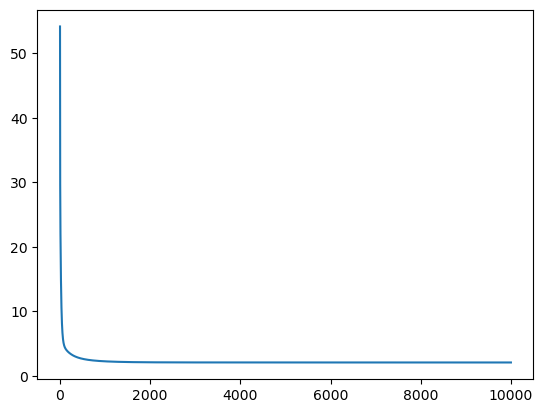

In [ ]:
plt.plot(range(n_iterations), cost_history)
plt.show()

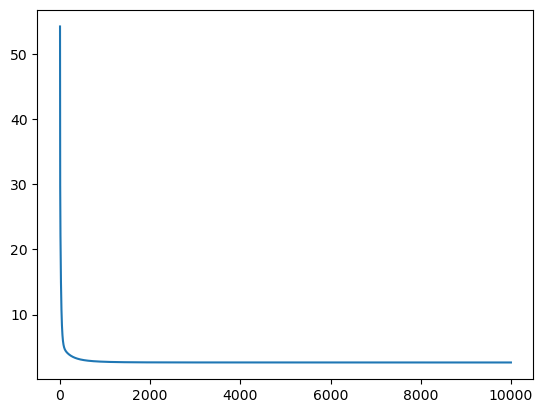

In [ ]:
plt.plot(range(n_iterations), cost_history_reg)
plt.show()

In [ ]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v


In [ ]:
c_test=coef_determination(y_test, predictions_test)
c_test

0.8424098927323636

In [ ]:
c_testReg=coef_determination(y_test, predictions_testReg)
c_testReg

0.8371583484477874

In [ ]:
c_train=coef_determination(y_train, predictions_train)
c_train

0.8471731704870359

In [ ]:
c_trainReg=coef_determination(y_train, predictions_trainReg)
c_trainReg

0.8428880755158681

In [ ]:
print(c_test-c_testReg)
print(c_train-c_trainReg)

0.005251544284576193
0.004285094971167802


 |            |Avec regularisation|Sans regularisation|
------|------|--------|
 Fonction cout|74.33055349680554|74.28430598427326|
 Coef determination TEST|0.8371583484477874|0.8424098927323636|
 Coef determination TRAIN|0.8428880755158681|0.8471731704870359